# Balls Recognizer
The goal of this project is to classify 12 different types of Sports Balls . The types are following: <br/>
1. Base ball
2. Cricket Ball
3. Soccer Ball
4. Basket Ball
5. Tennis Ball
6. Billiard Ball
7. Bowling Ball
8. Rugby Ball
9. Ping Pong Ball
10. Squash Ball
11. Volley Ball
12. Golf Ball


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Balls_Category

/content/drive/My Drive/Balls_Category


In [ ]:
ball_labels = [
    "Base ball",
"Cricket Ball",
"Soccer Ball",
"Basket Ball",
"Tennis Ball",
"Billiard Ball",
"Bowling Ball",
"Rugby Ball",
"Ping Pong Ball",
"Squash Ball",
"Volley Ball",
"Golf Ball"
]
len(ball_labels)

12

In [ ]:
images = search_images_ddg(ball_labels[2])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.soccerpro.com/wp-content/uploads/sc3101_008_nike_pitch_training_ball_01.jpg'

In [ ]:
dest = "Soccer Ball.jpg"
download_url(images[0], dest, show_progress=False)

Path('Soccer Ball.jpg')

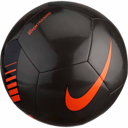

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for ball_type in ball_labels:

  dest = f"{data_path}/{ball_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    ball_image_urls = search_images_ddg(ball_type)
    download_images(dest, urls = ball_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#4373) [Path('data/Base ball/b6136c66-cadb-436d-b640-ae94b1ea1ef6.jpg'),Path('data/Base ball/8ff42a97-a5c3-47c2-9232-f8d14812ce82.jpg'),Path('data/Base ball/5889c205-bee2-48c9-82ba-45addde91ba1.jpg'),Path('data/Base ball/49757331-a6d9-4112-b356-c74372493489.jpg'),Path('data/Base ball/064c1d6e-5d14-4b21-9130-c240f4493db5.jpg'),Path('data/Base ball/b6466e7f-d337-4cf6-8195-258e25772de9.jpg'),Path('data/Base ball/5e29d096-859e-4c4e-8df5-889c681b5b58.jpg'),Path('data/Base ball/124d14cb-a73c-4f96-b452-868e7b065051.jpg'),Path('data/Base ball/f8880f8d-00bf-428b-943e-d29cad6d4d32.jpg'),Path('data/Base ball/2757fc0f-daa8-49cd-b5a5-fbbe050c3c9c.png')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#78) [Path('data/Base ball/66a4f491-6baa-4e7f-878f-66450a6c3ee4.jpg'),Path('data/Base ball/f75b057e-f53b-40bb-a890-fbc8d111df6b.jpg'),Path('data/Base ball/4c975825-309e-4f37-86de-037f1f18cf56.jpg'),Path('data/Base ball/bfeb2e99-0d58-4dcc-be71-4ae5aa5dbde1.svg'),Path('data/Cricket Ball/b94b9545-d0eb-453b-97e6-5b84d0ea8248.png'),Path('data/Cricket Ball/cd6363b9-5dd7-4c70-9745-6246d10162ed.jpg'),Path('data/Cricket Ball/e866a2f8-54d8-493c-8366-ae9ec1c49cce.jpg'),Path('data/Cricket Ball/b1dc54e4-9ba6-4da9-b373-0a5402a08469.JPG'),Path('data/Cricket Ball/40e2b748-5e39-4bb1-b99f-3cb1f488e9ff.jpg'),Path('data/Soccer Ball/e55b4086-8950-48a7-907e-daddcf6b4298.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#78) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

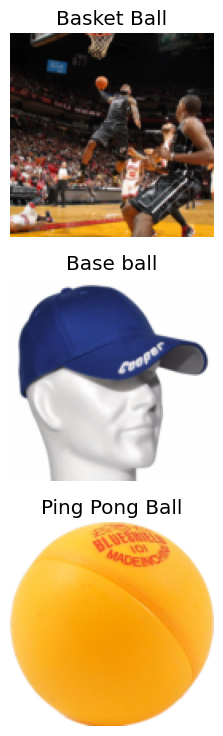

In [ ]:
dls.train.show_batch(max_n=3, nrows=3)

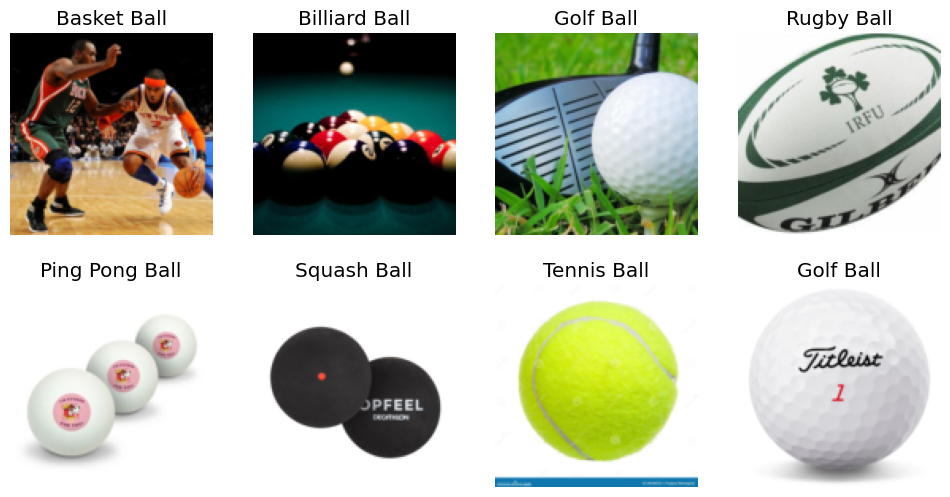

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


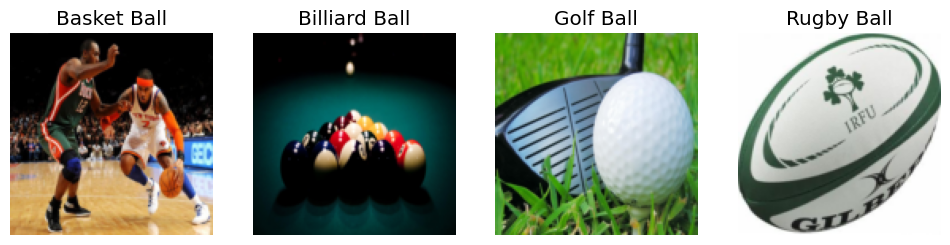

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

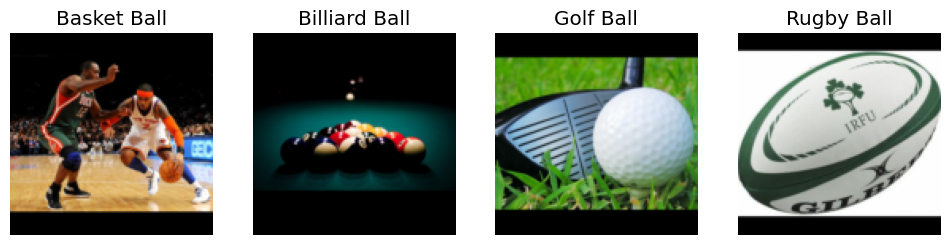

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

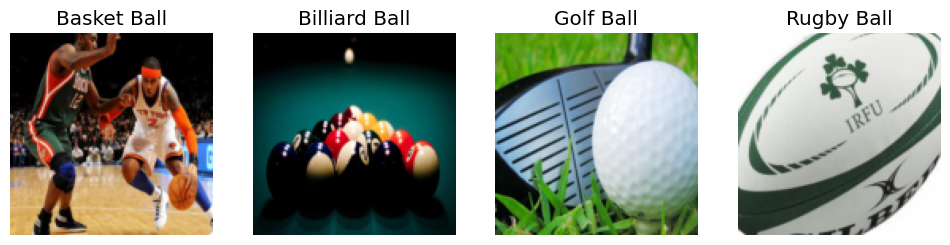

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

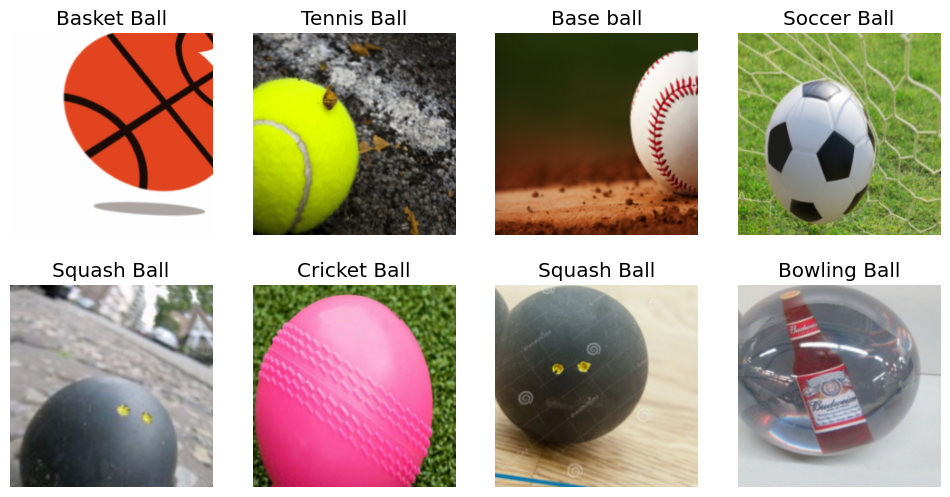

In [ ]:

dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "Ball_Recognizer-v0.pkl")